In [1]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

In [2]:
SIZE=256  #Limiting to 256 size image as my laptop cannot handle larger images. 
img_data=[]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


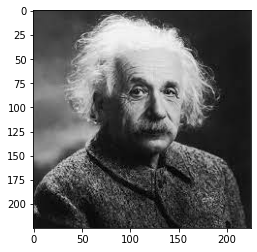

In [4]:
img=cv2.imread('/content/drive/MyDrive/KLA/Einstein.jpg', 1)   #Change 1 to 0 for Grey scale images
imshow(img)

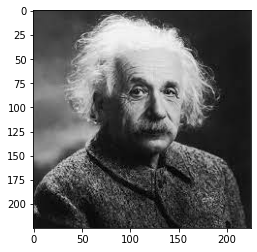

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #Changing BGR to RGB to show images in true colors
imshow(img)

In [6]:
img=cv2.resize(img,(SIZE, SIZE))
img_data.append(img_to_array(img))

In [7]:

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.

In [8]:

img_data2=[]  #Second image to be provided as ground truth.

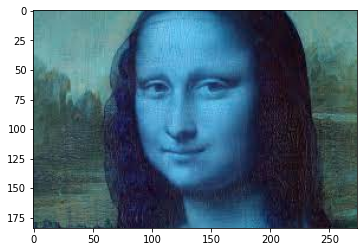

In [9]:
img2=cv2.imread('/content/drive/MyDrive/KLA/mona.jpg', 1)   #Change 1 to 0 for Grey scale images
imshow(img2)

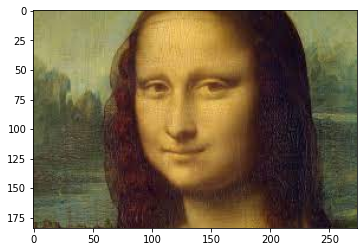

In [10]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)#Changing BGR to RGB to show images in true colors
imshow(img2)

In [11]:
img2=cv2.resize(img2,(SIZE, SIZE))
img_data2.append(img_to_array(img2))

In [12]:
img_array2 = np.reshape(img_data2, (len(img_data2), SIZE, SIZE, 3))
img_array2 = img_array2.astype('float32') / 255.

In [13]:
#Define Autoencoder model. 

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

In [14]:
model.add(MaxPooling2D((2, 2), padding='same'))

In [15]:
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

In [16]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 8)        0

In [17]:
model.fit(img_array, img_array2,
        epochs=500,                  #1000s of epochs needed for good results. Use GPU.
        shuffle=True)           #Shuffle data for each epoch

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 0.1321 - accuracy: 0.7106
Epoch 2/500
1/1 [==============================] - 0s 190ms/step - loss: 0.1156 - accuracy: 0.7108
Epoch 3/500
1/1 [==============================] - 0s 183ms/step - loss: 0.1010 - accuracy: 0.7104
Epoch 4/500
1/1 [==============================] - 0s 180ms/step - loss: 0.0848 - accuracy: 0.7106
Epoch 5/500
1/1 [==============================] - 0s 182ms/step - loss: 0.0687 - accuracy: 0.7107
Epoch 6/500
1/1 [==============================] - 0s 183ms/step - loss: 0.0564 - accuracy: 0.7108
Epoch 7/500
1/1 [==============================] - 0s 194ms/step - loss: 0.0540 - accuracy: 0.7110
Epoch 8/500
1/1 [==============================] - 0s 196ms/step - loss: 0.0600 - accuracy: 0.7111
Epoch 9/500
1/1 [==============================] - 0s 189ms/step - loss: 0.0609 - accuracy: 0.7123
Epoch 10/500
1/1 [==============================] - 0s 191ms/step - loss: 0.0558 - accuracy: 0.7129
Epoch 11/500

In [18]:
print("Output")
pred = model.predict(img_array)   #Predict model on the same input array.

Output


In [19]:

#In reality, train on 1000s of input images and predict on images that the training 
#algorithm never saw.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


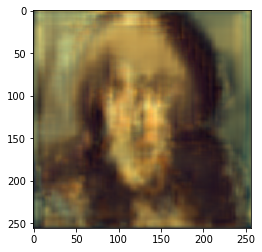

In [20]:

imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")

In [21]:
#img2 = Image.fromarray(pred[0], 'RGB')
#imshow(img2)
#img2.save("processed_img.jpg")

In [22]:
model.fit(img_array, img_array2,
        epochs=1500,                  #1000s of epochs needed for good results. Use GPU.
        shuffle=True)           #Shuffle data for each epoch

Epoch 1/1500
1/1 [==============================] - 0s 178ms/step - loss: 0.0075 - accuracy: 0.7836
Epoch 2/1500
1/1 [==============================] - 0s 184ms/step - loss: 0.0075 - accuracy: 0.7832
Epoch 3/1500
1/1 [==============================] - 0s 185ms/step - loss: 0.0076 - accuracy: 0.7839
Epoch 4/1500
1/1 [==============================] - 0s 177ms/step - loss: 0.0079 - accuracy: 0.7832
Epoch 5/1500
1/1 [==============================] - 0s 182ms/step - loss: 0.0079 - accuracy: 0.7847
Epoch 6/1500
1/1 [==============================] - 0s 184ms/step - loss: 0.0080 - accuracy: 0.7830
Epoch 7/1500
1/1 [==============================] - 0s 183ms/step - loss: 0.0077 - accuracy: 0.7850
Epoch 8/1500
1/1 [==============================] - 0s 180ms/step - loss: 0.0075 - accuracy: 0.7836
Epoch 9/1500
1/1 [==============================] - 0s 194ms/step - loss: 0.0074 - accuracy: 0.7849
Epoch 10/1500
1/1 [==============================] - 0s 186ms/step - loss: 0.0075 - accuracy: 0.7852

In [23]:
print("Output")
pred = model.predict(img_array)   #Predict model on the same input array.

Output


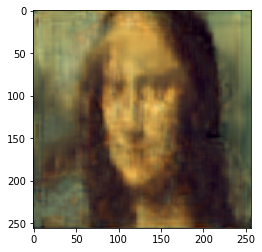

In [24]:

imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")